Alexandre Assmus / Abigail Berthe-Pardo / Marina Musse

In [1]:
#libraries

import pandas as pd
import json
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils import shuffle
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn import metrics
import matplotlib.pyplot as plt
import nbimporter
from part1_data_analysis import extract_after_last_slash
import re


## K-MEANS ###################

## Text input ###############

In [5]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,Pavlos Prosalentis (Greek: Παύλος Προσαλέντης;...,1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Gerhard Henning (27 May 1880 – 16 September 19...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,"José Belloni (September 12, 1882 – November 2...",1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [6]:
df_cluster.shape

(260, 2)

In [7]:
#check if the number of items per category is the same 
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [38]:
df_cluster = shuffle(df_cluster)
df_cluster.head(20)

,text,category,cluster
250,Lorenzo Domínguez (Santiago de Chile 1901-Mend...,1,0
38,"Petru Buburuz (born 26 September 1937, Durleşt...",0,1
53,"Juan Manuel Ferrari was an Uruguayan sculptor,...",1,0
253,Waldo Díaz-Balart y Gutiérrez (born February 1...,1,0
196,Viačasłaŭ Uładzimieravič Adamčyk (Belarusian: ...,0,1
246,Ithiel Roberto Eisenmann Field Jr. is a Panama...,0,1
218,"Fabio Gadea Mantilla (born November 9, 1931, i...",0,1
144,"Kayode Akintemi (born June 26, 1965) is a Nige...",0,1
153,"Omar Rayo Reyes (January 20, 1928 – June 7, 20...",1,0
154,Vann Nath (Khmer: វ៉ាន់ណាត; 1946 – 5 September...,1,1


In [39]:
X = df_cluster['text']
Y = df_cluster['category']

In [40]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800 -1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=1000, 
                                       use_idf=True,
                                       stop_words='english')
                                       
                                      

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)





In [41]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['000' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1918'
 '1931' '1941' '1942' '1944' '1945' '1948' '1949' '1950' '1951' '1952'
 '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961' '1962'
 '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1980s' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '20' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021' '2022' '2023' '21' '22' '23' '24' '25' '26' '27' '28' '30' '31'
 '978' 'able' 'abstract' 'academy' 'according' 'active' 'activities'
 'actress' 'adaptation' 'added' 'addition' 'aden' 'adventures' 'africa'
 'african' 'age' 'agustín' 'aires' 'ajl' 'akpan' 'al' 'alberto'
 'alejandro' 'alongside' 'alpuy' 'america' 'american' 'anatsui' 'anchor'
 'andrew' 'an

In [42]:

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(tfidf_matrix)

# Get cluster assignments for the data
predicted_labels = km.labels_
clusters = predicted_labels.tolist()


print(predicted_labels[0:20])


[1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1]


In [43]:
texts = df_cluster['text'].values
labels = df_cluster['category'].values

data = {'text':texts,'category':labels,'cluster':clusters}
df_cluster = pd.DataFrame(data,columns=['text','category','cluster'])
#df_cluster.head(40)

In [44]:
# Print out number of items per clusters
df_cluster['cluster'].value_counts()

cluster
0    138
1    122
Name: count, dtype: int64

In [45]:
print("Top terms per cluster:")
true_k = np.unique(km.labels_).shape[0]
print("True number of clusters: ", true_k)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    # print tokens of clusters centroids (TF-IDF decreasing values)
    for ind in order_centroids[i, :10]:  # Adjust the number here to display more or fewer terms
        print(' %s' % features[ind], end='')
    print('\n')


Top terms per cluster:
True number of clusters:  2
Cluster 0: editor journalist newspaper news la russian soviet el armenian published

Cluster 1: art sculpture museum sculptor work works gallery arts artist new



In [46]:
from sklearn import metrics
print( labels)
print( km.labels_)

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, km.labels_))

print()


[1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0
 1]
[1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 1 1 0 1 1 0 0 1 

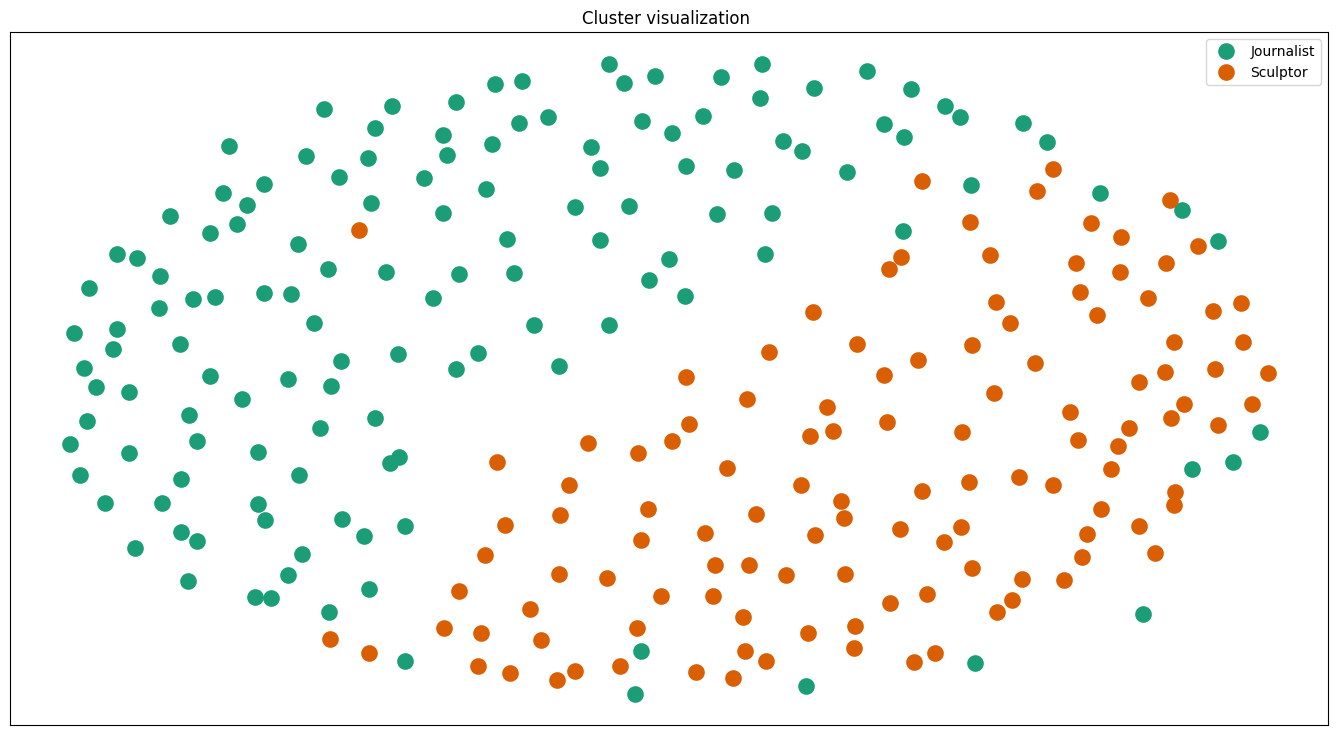

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input  

In [85]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [86]:
# We want numerical data for category
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster
#df_cluster.to_csv('df_cluster.csv', sep=",", encoding="utf-8")



,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Wenzel_Profant owl#sameAs 174260199. Wenzel_Pr...,1
256,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
257,Luis_Ramacciotti subject Category:Year_of_deat...,1
258,Omar_Rayo wikiPageWikiLink Latin_American_art....,1


In [87]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [88]:
# Shuffle the data
df_cluster = shuffle(df_cluster)


In [89]:
X = df_cluster['text']
Y = df_cluster['category']

In [90]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800-1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=1000, 
                                       use_idf=True,
                                       stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)




In [91]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '1822' '1840' '1843' '1866' '1875' '1880' '1882'
 '1883' '1888' '1889' '1892' '1895' '1898' '1899' '19' '1900' '1902'
 '1903' '1905' '1906' '1907' '1910' '1913' '1918' '1919' '1920' '1921'
 '1922' '1923' '1924' '1925' '1927' '1928' '1931' '1933' '1934' '1935'
 '1936' '1937' '1941' '1942' '1944' '1945' '1948' '1949' '1950' '1952'
 '1953' '1954' '1956' '1957' '1958' '1959' '1960' '1965' '1967' '1968'
 '1971' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982'
 '1985' '1986' '1987' '1989' '1993' '1994' '1997' '1998' '19th' '20'
 '2000' '2001' '2002' '2003' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2019' '2020' '20th'
 '21' '21st' '22' '23' '24' '25' '26' '27' '28' '30' '300' '31'
 '_arkadyevich_ureklyan' '_chop' '_echeverría' '_fernández' '_halpine'
 '_morecambe' '_r' '_ralph_casimir' '_roberto_eisenmann_jr'
 '_the_association_of_lgbtq_j

In [92]:

# Initialize and fit KMeans algorithm
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(tfidf_matrix)

# Get cluster assignments for the training data
predicted_labels = km.labels_
clusters = predicted_labels.tolist()


print(predicted_labels[0:10])


[0 0 0 0 0 1 0 0 0 0]


In [93]:
texts = df_cluster['text'].values
labels = df_cluster['category'].values

data = {'text':texts,'category':labels,'cluster':clusters}
df_cluster = pd.DataFrame(data,columns=['text','category','cluster'])

In [94]:
#print( labels)
#print( km.labels_)

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, km.labels_))

print()

Supervised metrics:
Homogeneity: 0.015
Completeness: 0.017
V-measure: 0.016
Adjusted Rand-Index: 0.014
Unsupervised metric:
Silhouette Coefficient: 0.001



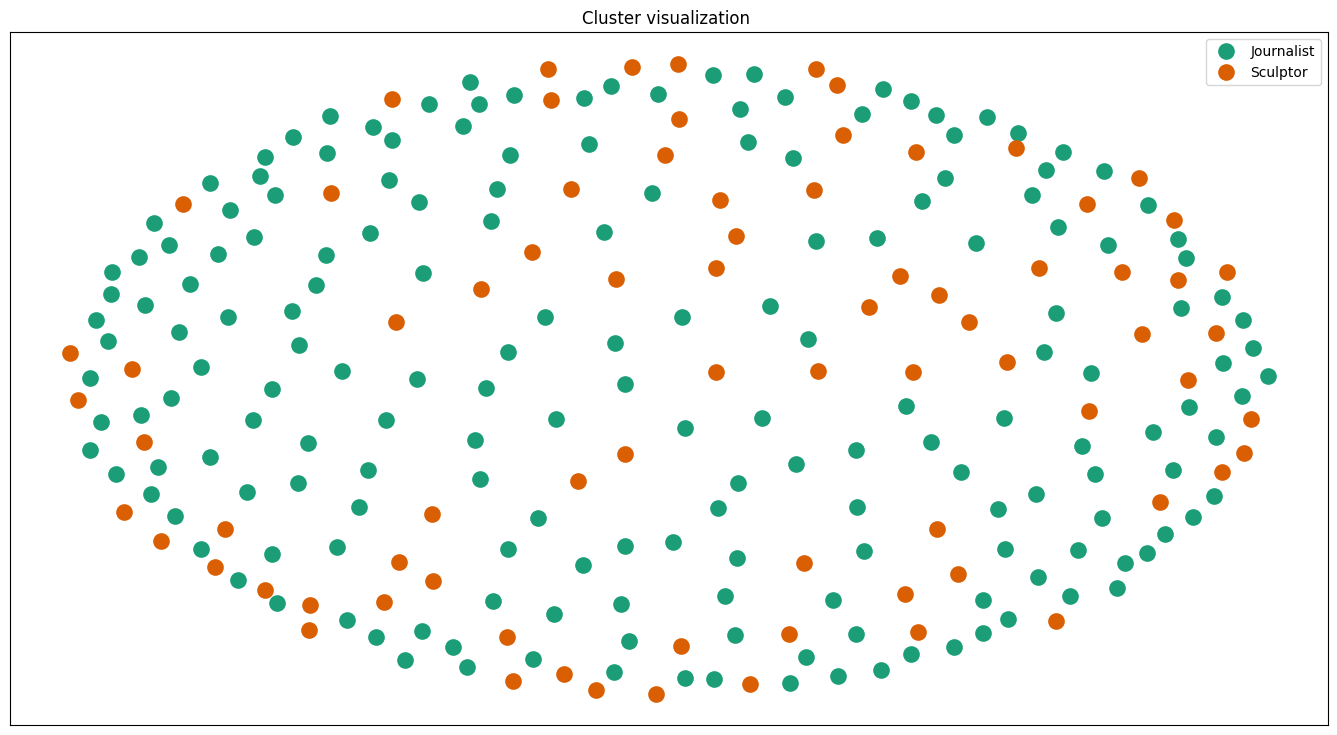

In [95]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## DBSCAN #####

## Text input ####

In [120]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,Pavlos Prosalentis (Greek: Παύλος Προσαλέντης;...,1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Gerhard Henning (27 May 1880 – 16 September 19...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,"José Belloni (September 12, 1882 – November 2...",1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [134]:
bio = df_cluster["text"]


In [144]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, use_idf=True, stop_words='english')

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)



In [145]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(tfidf_matrix)

cluster_labels = dbscan.fit_predict(tfidf_matrix.toarray())
labels = df_cluster["category"].values



In [146]:
no_clusters = len(np.unique(cluster_labels))
no_noise = np.sum(np.array(cluster_labels) == -1)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(cluster_labels)

Estimated no. of clusters: 2
Estimated no. of noise points: 89
[ 0 -1  0 -1 -1 -1  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0 -1 -1
  0 -1  0 -1  0 -1 -1 -1  0  0 -1  0  0  0  0  0  0 -1 -1  0  0  0 -1 -1
 -1 -1  0 -1 -1 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1 -1  0 -1  0  0  0  0 -1 -1
  0 -1 -1  0 -1  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0
  0  0 -1  0 -1  0 -1 -1  0  0  0 -1  0  0  0 -1 -1  0  0 -1  0  0  0  0
  0  0  0 -1 -1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0  0 -1  0  0
 -1  0 -1  0 -1  0  0  0 -1  0  0 -1  0 -1  0 -1 -1  0  0  0 -1  0 -1  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1 -1  0 -1  0  0 -1  0
  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0  0 -1  0 -1 -1]


In [147]:
print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.003
Unsupervised metric:
Silhouette Coefficient: 0.000



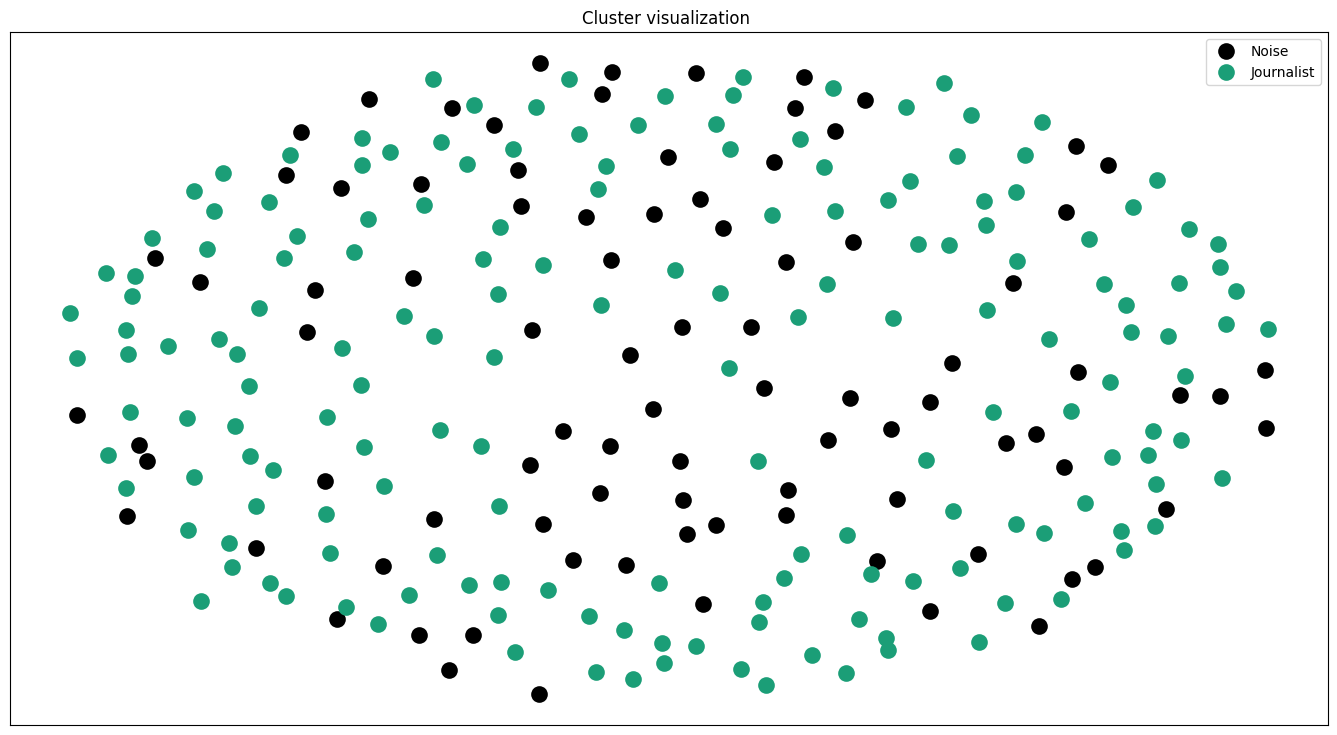

In [148]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', -1: '#000000' }

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor', -1 : 'Noise'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=cluster_labels))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input ###

In [149]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [192]:
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster

,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Wenzel_Profant owl#sameAs 174260199. Wenzel_Pr...,1
256,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
257,Luis_Ramacciotti subject Category:Year_of_deat...,1
258,Omar_Rayo wikiPageWikiLink Latin_American_art....,1


In [193]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [223]:
bio = df_cluster['text']

In [265]:
tfidf_vectorizer = TfidfVectorizer(max_features=700, 
                                       use_idf=True,
                                       stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)

In [266]:
dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(tfidf_matrix)

cluster_labels = dbscan.fit_predict(tfidf_matrix.toarray())
labels = df_cluster["category"].values




In [267]:
no_clusters = len(np.unique(cluster_labels))
no_noise = np.sum(np.array(cluster_labels) == -1)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(cluster_labels)

Estimated no. of clusters: 2
Estimated no. of noise points: 255
[-1 -1  0 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [268]:
print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels, sample_size=1000))

print()

Supervised metrics:
Homogeneity: 0.020
Completeness: 0.142
V-measure: 0.034
Adjusted Rand-Index: 0.001
Unsupervised metric:
Silhouette Coefficient: -0.011



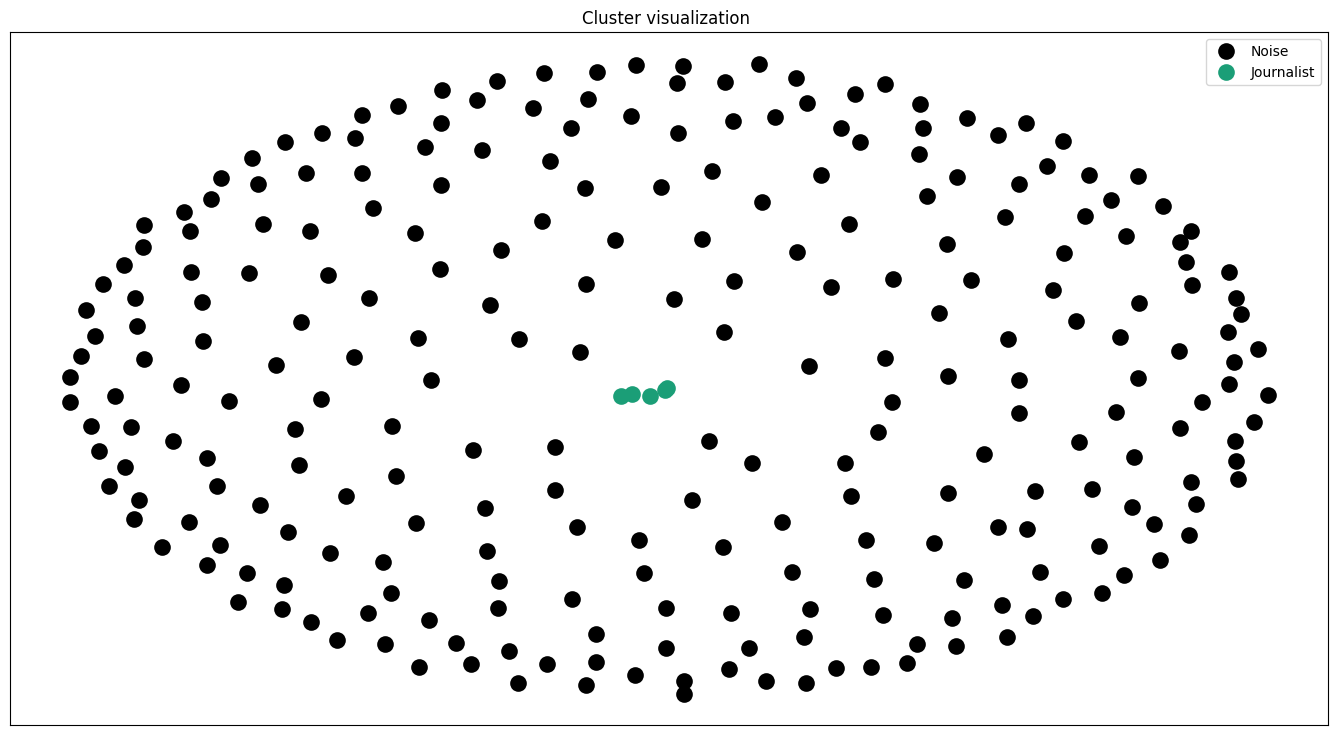

In [269]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', -1: '#000000' }

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor', -1 : 'Noise'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=cluster_labels))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## Agglomerative clustering ######

## Text input #####

In [270]:
from sklearn.cluster import AgglomerativeClustering

# Chargement des données
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
     'category': data_cluster['target']})



In [271]:
bio = df_cluster["text"]
tfidf_vectorizer = TfidfVectorizer(max_features=700, use_idf=True, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(bio)

In [272]:
# configuration of Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=2)
# apply the clustering
cluster_labels = agg_clust.fit_predict(tfidf_matrix.toarray())

labels = df_cluster['category'].values



In [273]:

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.561
Completeness: 0.563
V-measure: 0.562
Adjusted Rand-Index: 0.664
Unsupervised metric:
Silhouette Coefficient: 0.022



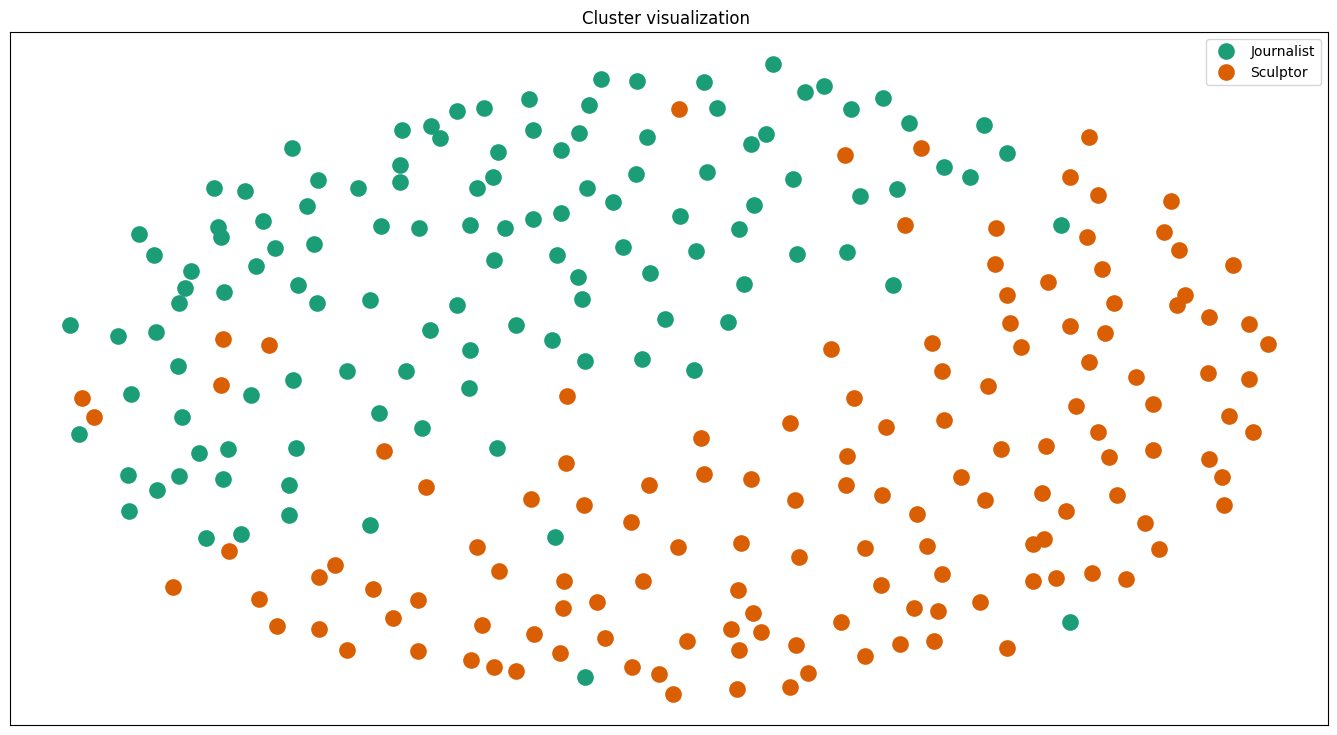

In [274]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=agg_clust.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input ####

In [275]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [276]:
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster

,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Wenzel_Profant owl#sameAs 174260199. Wenzel_Pr...,1
256,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
257,Luis_Ramacciotti subject Category:Year_of_deat...,1
258,Omar_Rayo wikiPageWikiLink Latin_American_art....,1


In [277]:
bio = df_cluster["text"]

# max_features = 800-1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=1200, 
                                       use_idf=True,
                                       stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)



In [278]:
# configuration of Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=2)
# apply the clustering
cluster_labels = agg_clust.fit_predict(tfidf_matrix.toarray())

labels = df_cluster['category'].values


In [279]:

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.000
Unsupervised metric:
Silhouette Coefficient: 0.001



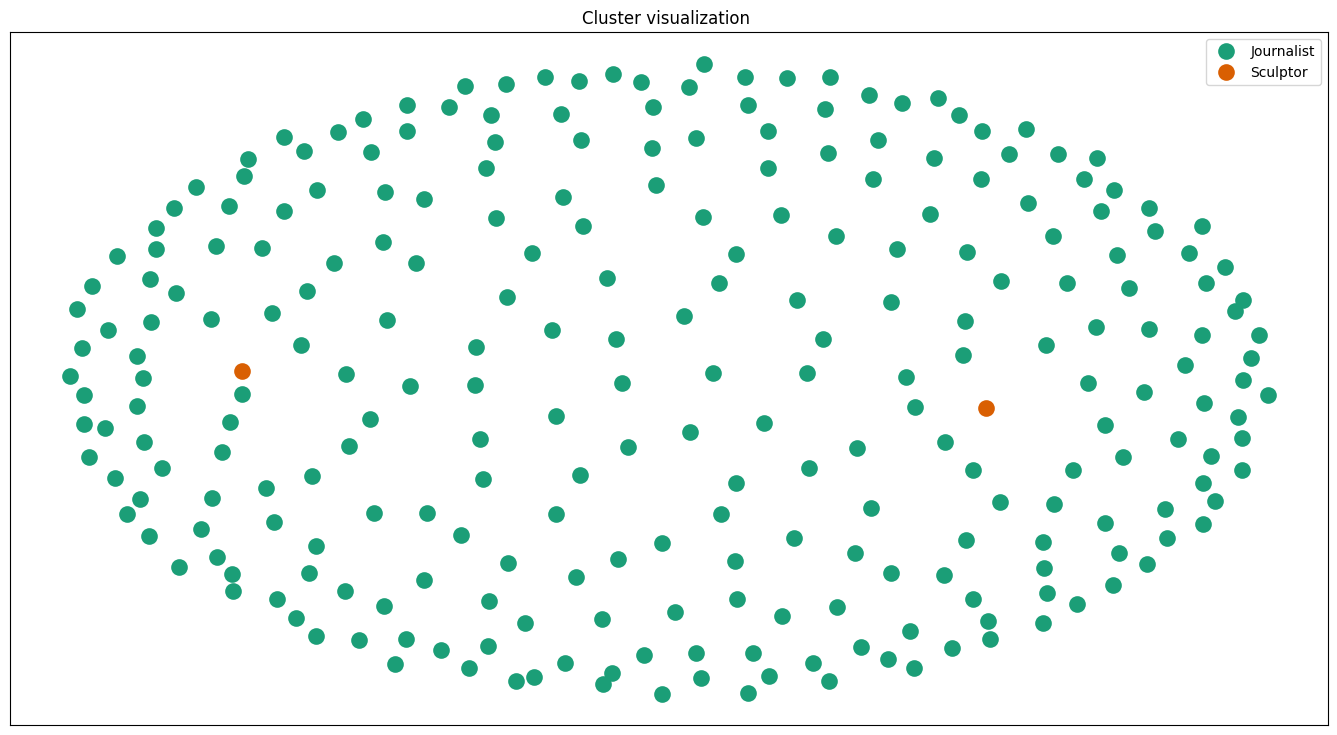

In [280]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=agg_clust.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()